In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout
from joblib import load
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
folder_path ='to_your_path' # Замените на путь к вашему файлу


In [3]:
file_name1 ='train_data.csv' 
file_name2 ='test_data.csv'
file_path = os.path.join(folder_path, file_name1)
file_path2 = os.path.join(folder_path, file_name2)

data = pd.read_csv(file_path)
column_name = data.columns


# Настройка параметров временных окон
n_steps = 10  # количество временных шагов в каждом окне

# Функция для создания окон данных
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Подготовка данных
X, y = create_dataset(data[column_name].values, n_steps)

# Решейпинг X для CNN
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

new_data = pd.read_csv(file_path2)
new_data = new_data.drop('date', axis=1)

new_X, _ = create_dataset(new_data[column_name].values, n_steps)  # Предполагаем, что функция `create_dataset` уже определена
new_X = new_X.reshape((new_X.shape[0], n_steps, 1))


D:\miniconda\envs\EDA_DATA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          12,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,093 (51.14 KB)

 Trainable params: 13,093 (51.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 1.3575e-04 - val_loss: 9.4225e-05
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.2417e-04 - val_loss: 1.0903e-04
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.3105e-04 - val_loss: 9.4493e-05
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.2107e-04 - val_loss: 9.4325e-05
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.2450e-04 - val_loss: 9.8558e-05
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.1723e-04 - val_loss: 9.3503e-05
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.2133e-04 - val_loss: 1.0112e-04
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.2130e-04 - val_loss: 9.3520e-05
Epoch 9/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1.1567e-04 - val_loss: 9.3825e-05
Epoch 10/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.2465e-04 - val_loss: 9.5628e-05
Epoch 11/50
4000/4000 ━━━━━━━━━━

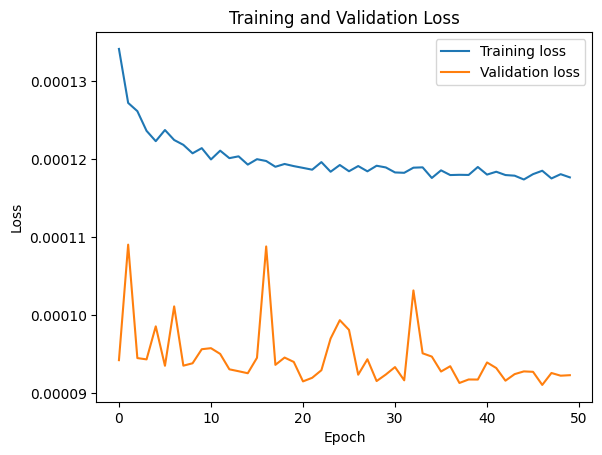

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Создание модели
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse')

# Вывод структуры модели
model.summary()
# Обучение модели

history = model.fit(X, y, epochs=50, verbose=1, validation_split=0.2)

# Визуализация истории обучения
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_name = os.path.join(folder_path, 'my_model_cnn.keras')
model.save(model_name)  # Сохраняет модель в формате HDF5


1235/1235 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step
[[0.00841466]
 [0.00844327]
 [0.00773562]
 ...
 [0.00333699]
 [0.00350498]
 [0.00319191]]


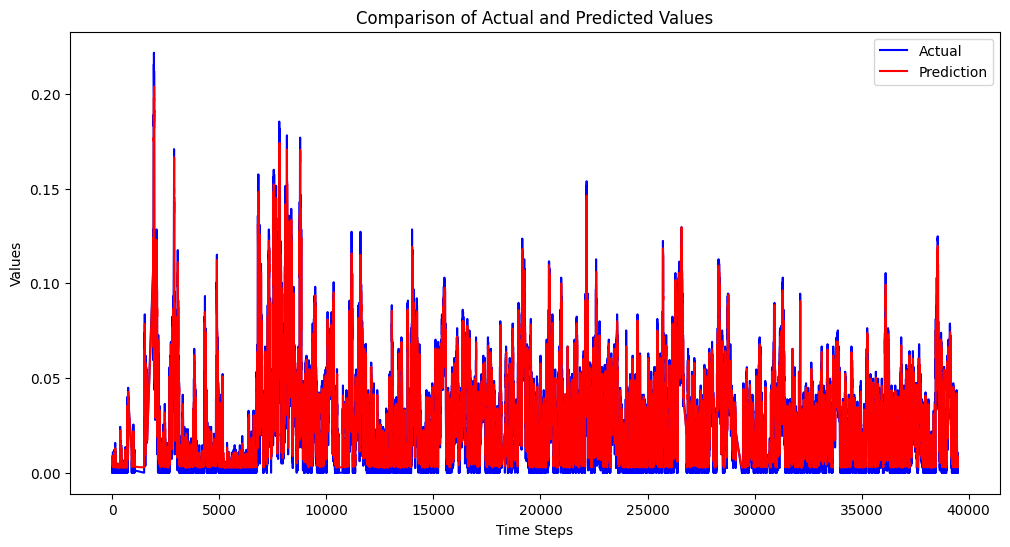

In [5]:
# Загружаем модель
model_name = os.path.join(folder_path, 'my_model_cnn.keras')
model = load_model(model_name)

# Прогнозирование
predictions = model.predict(new_X)
print(predictions)  # Вывод предсказанных значений

# Создание массива индексов для оси X (должен соответствовать длине predictions)
time_steps = range(len(predictions))

# Отображаемая часть фактических данных должна быть сокращена, чтобы соответствовать размеру predictions
actual = new_data[column_name][n_steps:]  # уменьшаем размер на n_steps, потому что мы использовали их для создания окон

plt.figure(figsize=(12, 6))
plt.plot(time_steps, actual, 'b-', label='Actual')
plt.plot(time_steps, predictions, 'r-', label='Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

D:\miniconda\envs\EDA_DATA\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 7.3017e-05 - val_loss: 5.4054e-05
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 6.7335e-05 - val_loss: 4.9950e-05
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.1891e-05 - val_loss: 4.9889e-05
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 6.2803e-05 - val_loss: 5.1373e-05
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.4617e-05 - val_loss: 5.4374e-05
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 7.6420e-05 - val_loss: 4.9844e-05
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.7866e-05 - val_loss: 4.9970e-05
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 6.6502e-05 - val_loss: 4.9974e-05
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 6.5859e-05 - val_loss: 4.9348e-05
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 7.8790e-05 - val_loss: 4.9813e-05
Epoch 11/20
4000/4000 ━━━━━━━

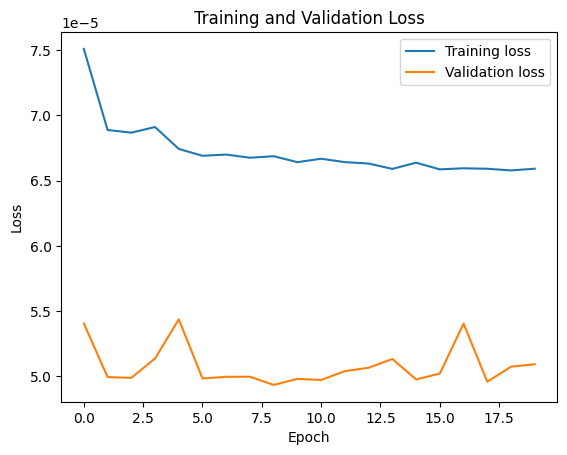

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(SimpleRNN(units=50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# Вывод структуры улучшенной модели
model.summary()
# Обучение модели
history = model.fit(X, y, epochs=20, verbose=1, validation_split=0.2)

# Визуализация истории обучения
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_name = os.path.join(folder_path, 'my_model_rnn.keras')
model.save(model_name)  # Сохраняет модель в формате HDF5


1235/1235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[0.00791642]
 [0.0011422 ]
 [0.00523522]
 ...
 [0.00173524]
 [0.00174707]
 [0.00174225]]


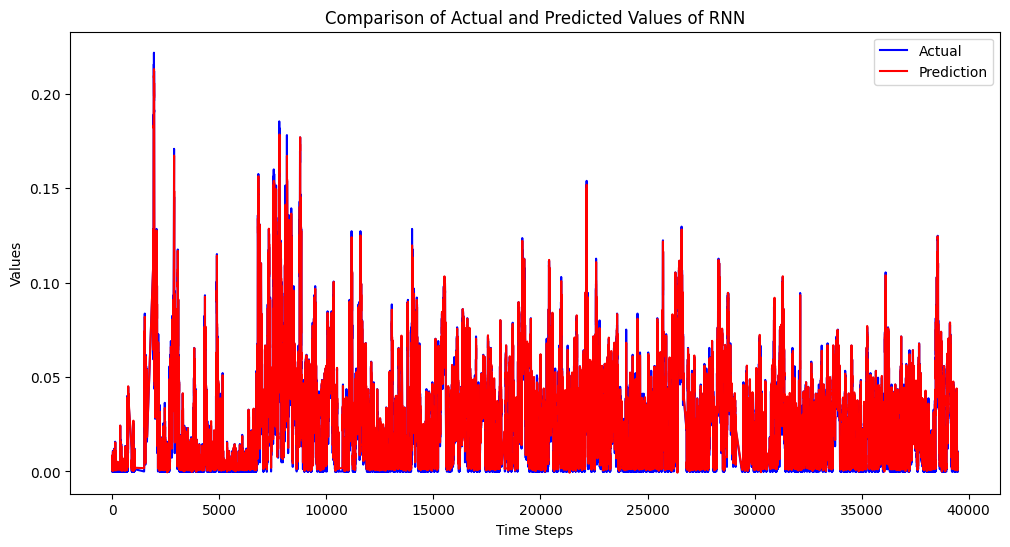

In [7]:
# Загружаем модель
model_name = os.path.join(folder_path, 'my_model_rnn.keras')
model = load_model(model_name)
# Предположим, что `new_data` - это ваш новый временной ряд

# Прогнозирование
predictions = model.predict(new_X)
print(predictions)  # Вывод предсказанных значений

# Создание массива индексов для оси X (должен соответствовать длине predictions)
time_steps = range(len(predictions))

# Отображаемая часть фактических данных должна быть сокращена, чтобы соответствовать размеру predictions
actual = new_data[column_name][n_steps:]  # уменьшаем размер на n_steps, потому что мы использовали их для создания окон

plt.figure(figsize=(12, 6))
plt.plot(time_steps, actual, 'b-', label='Actual')
plt.plot(time_steps, predictions, 'r-', label='Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values of RNN')
plt.legend()
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 1.4904e-04 - val_loss: 5.0241e-05
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 7.8204e-05 - val_loss: 4.9975e-05
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 6.2540e-05 - val_loss: 5.0262e-05
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 7.8459e-05 - val_loss: 6.0942e-05
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 6.7027e-05 - val_loss: 5.6108e-05
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 7.1348e-05 - val_loss: 5.0174e-05
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 7.8184e-05 - val_loss: 4.9681e-05
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 6.2792e-05 - val_loss: 5.3003e-05
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 6.7397e-05 - val_loss: 5.0798e-05
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 6.1148e-05 - val_loss: 5.2655e-05
Epoch 11/20
4000/4000 ━━━━━━━

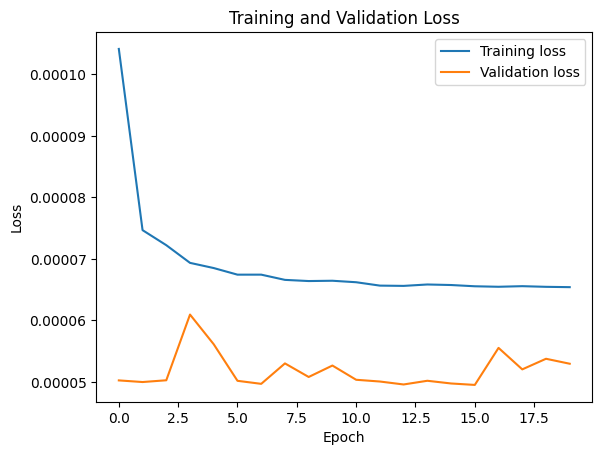

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# Вывод структуры улучшенной модели
model.summary()
# Обучение модели
history = model.fit(X, y, epochs=20, verbose=1, validation_split=0.2)

# Визуализация истории обучения
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_name = os.path.join(folder_path, 'my_model_lstm.keras')
model.save(model_name)  # Сохраняет модель в формате HDF5


1235/1235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[[ 0.00526448]
 [-0.00062796]
 [ 0.00309678]
 ...
 [-0.00135176]
 [-0.00138292]
 [-0.00140211]]


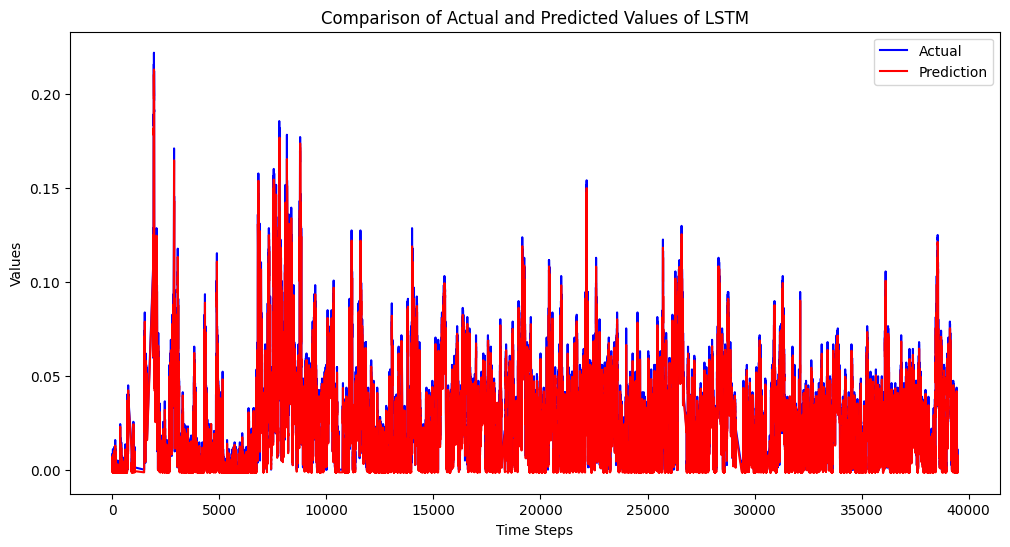

In [9]:
# Загружаем модель
model_name = os.path.join(folder_path, 'my_model_lstm.keras')
model = load_model(model_name)

# Прогнозирование
predictions = model.predict(new_X)
print(predictions)  # Вывод предсказанных значений

# Создание массива индексов для оси X (должен соответствовать длине predictions)
time_steps = range(len(predictions))

# Отображаемая часть фактических данных должна быть сокращена, чтобы соответствовать размеру predictions
actual = new_data[column_name][n_steps:]  # уменьшаем размер на n_steps, потому что мы использовали их для создания окон

plt.figure(figsize=(12, 6))
plt.plot(time_steps, actual, 'b-', label='Actual')
plt.plot(time_steps, predictions, 'r-', label='Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values of LSTM')
plt.legend()
plt.show()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 1.7101e-04 - val_loss: 6.5421e-05
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 9.7365e-05 - val_loss: 5.5491e-05
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 8.9663e-05 - val_loss: 5.3998e-05
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 1.0334e-04 - val_loss: 5.6346e-05
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 1.0592e-04 - val_loss: 5.8008e-05
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 8.3852e-05 - val_loss: 5.0754e-05
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 9.2709e-05 - val_loss: 5.2610e-05
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 8.0389e-05 - val_loss: 5.1131e-05
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 7.9746e-05 - val_loss: 5.5926e-05
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 8.5588e-05 - val_loss: 5.0838e-05
Epoch 11/20
4000/4000 ━━━━━━━

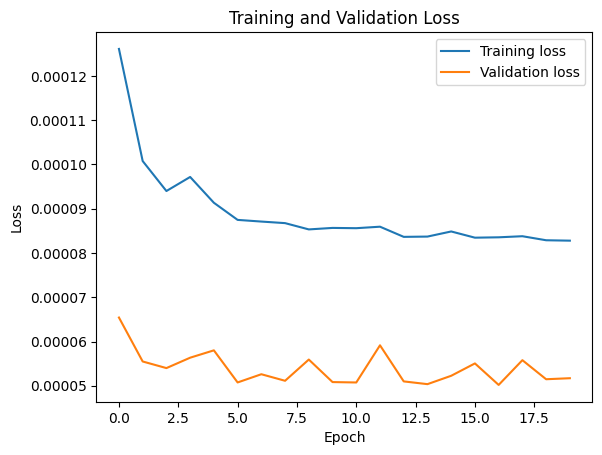

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# Вывод структуры улучшенной модели
model.summary()
# Обучение модели
history = model.fit(X, y, epochs=20, verbose=1, validation_split=0.2)

# Визуализация истории обучения
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_name = os.path.join(folder_path, 'my_model_lstm2.keras')
model.save(model_name)  # Сохраняет модель в формате HDF5


1235/1235 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[[0.00798232]
 [0.00330899]
 [0.00535255]
 ...
 [0.00204137]
 [0.00200996]
 [0.00199256]]


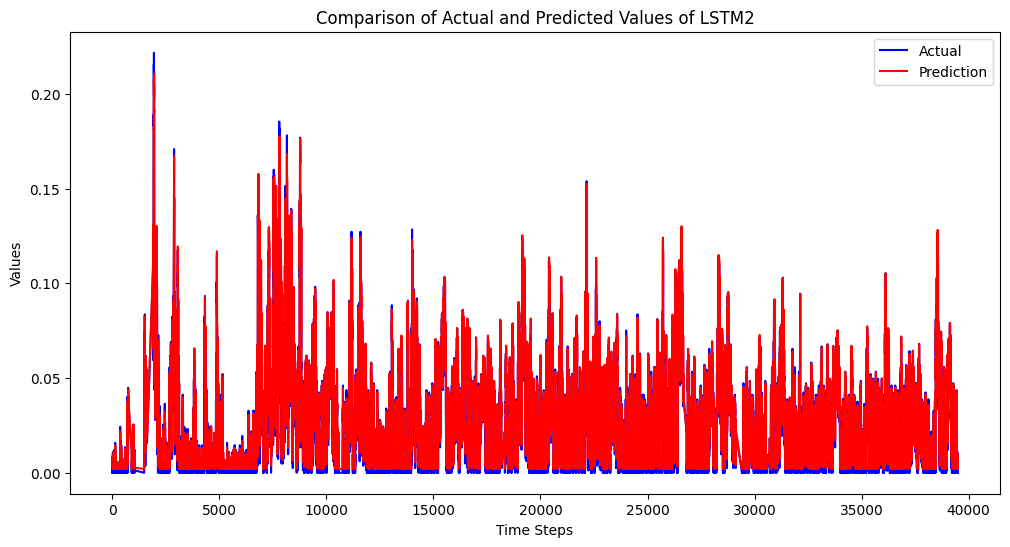

In [11]:
# Загружаем модель
model_name = os.path.join(folder_path, 'my_model_lstm2.keras')
model = load_model(model_name)

# Прогнозирование
predictions = model.predict(new_X)
print(predictions)  # Вывод предсказанных значений

# Создание массива индексов для оси X (должен соответствовать длине predictions)
time_steps = range(len(predictions))

# Отображаемая часть фактических данных должна быть сокращена, чтобы соответствовать размеру predictions
actual = new_data[column_name][n_steps:]  # уменьшаем размер на n_steps, потому что мы использовали их для создания окон

plt.figure(figsize=(12, 6))
plt.plot(time_steps, actual, 'b-', label='Actual')
plt.plot(time_steps, predictions, 'r-', label='Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values of LSTM2')
plt.legend()
plt.show()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 1.3435e-04 - val_loss: 4.9737e-05
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 8.8554e-05 - val_loss: 4.9747e-05
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 6.9455e-05 - val_loss: 5.0690e-05
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 6.7655e-05 - val_loss: 5.1123e-05
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 6.8023e-05 - val_loss: 5.0049e-05
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 5.9202e-05 - val_loss: 4.9846e-05
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 6.7420e-05 - val_loss: 5.4655e-05
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 6.1736e-05 - val_loss: 5.0028e-05
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 7.7295e-05 - val_loss: 5.0657e-05
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 6.2240e-05 - val_loss: 5.0821e-05
Epoch 11/20
4000/4000 ━━━━━━━

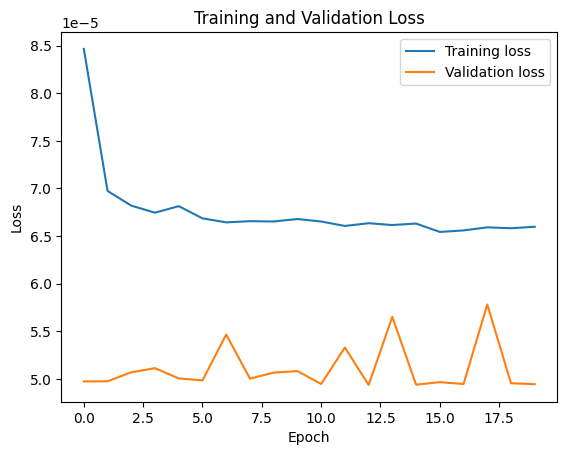

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(units=50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(GRU(units=50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Вывод структуры улучшенной модели
model.summary()
# Обучение модели
history = model.fit(X, y, epochs=20, verbose=1, validation_split=0.2)

# Визуализация истории обучения
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_name = os.path.join(folder_path, 'my_model_gru.keras')
model.save(model_name)  # Сохраняет модель в формате HDF5


1235/1235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[[0.00670103]
 [0.0016733 ]
 [0.00439621]
 ...
 [0.00062621]
 [0.0006214 ]
 [0.00061957]]


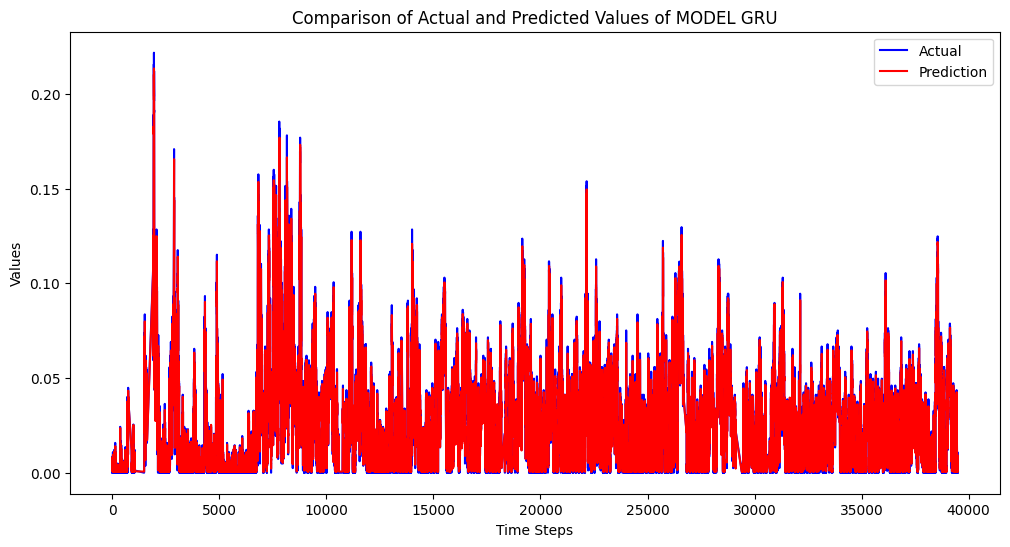

In [13]:
# Загружаем модель
model_name = os.path.join(folder_path, 'my_model_gru.keras')
model = load_model(model_name)

# Прогнозирование
predictions = model.predict(new_X)
print(predictions)  # Вывод предсказанных значений

# Создание массива индексов для оси X (должен соответствовать длине predictions)
time_steps = range(len(predictions))

# Отображаемая часть фактических данных должна быть сокращена, чтобы соответствовать размеру predictions
actual = new_data[column_name][n_steps:]  # уменьшаем размер на n_steps, потому что мы использовали их для создания окон

plt.figure(figsize=(12, 6))
plt.plot(time_steps, actual, 'b-', label='Actual')
plt.plot(time_steps, predictions, 'r-', label='Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values of MODEL GRU')
plt.legend()
plt.show()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 1.5029e-04 - val_loss: 5.8312e-05
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 9.6349e-05 - val_loss: 5.4585e-05
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 8.7868e-05 - val_loss: 5.2085e-05
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 8.9713e-05 - val_loss: 5.6992e-05
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 8.5383e-05 - val_loss: 5.1775e-05
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 8.6310e-05 - val_loss: 5.5041e-05
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 1.0014e-04 - val_loss: 5.1932e-05
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 9.9318e-05 - val_loss: 5.5005e-05
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 8.8793e-05 - val_loss: 5.6023e-05
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 9.2388e-05 - val_loss: 5.0460e-05
Epoch 11/20
4000/4000 ━━━━━━━

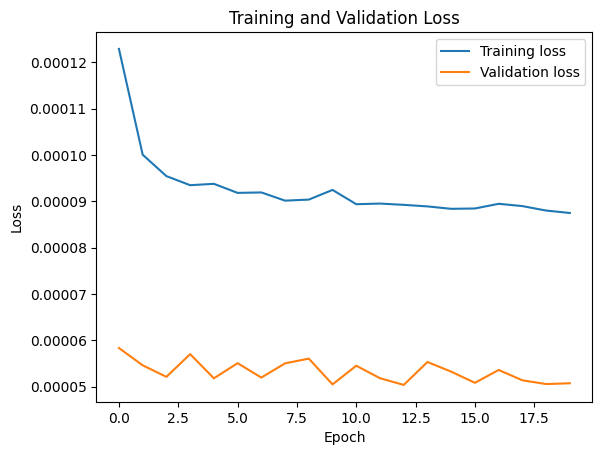

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(units=50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Вывод структуры улучшенной модели
model.summary()
# Обучение модели
history = model.fit(X, y, epochs=20, verbose=1, validation_split=0.2)

# Визуализация истории обучения
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_name = os.path.join(folder_path, 'my_model_gru2.keras')
model.save(model_name)  # Сохраняет модель в формате HDF5


1235/1235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[[0.00705764]
 [0.00315245]
 [0.00525536]
 ...
 [0.00166867]
 [0.00166209]
 [0.0016535 ]]


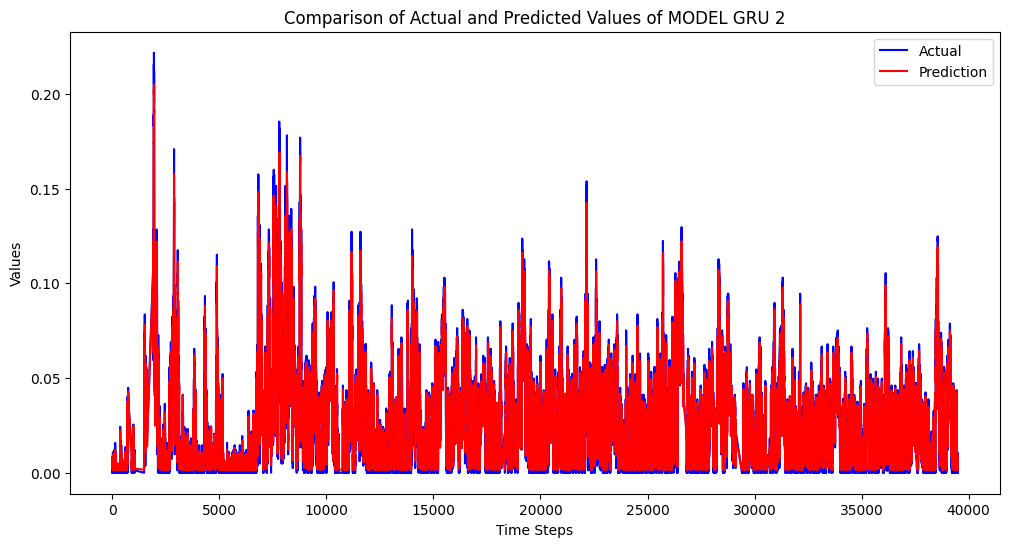

In [15]:
# Загружаем модель
model_name = os.path.join(folder_path, 'my_model_gru2.keras')
model = load_model(model_name)

# Прогнозирование
predictions = model.predict(new_X)
print(predictions)  # Вывод предсказанных значений

# Создание массива индексов для оси X (должен соответствовать длине predictions)
time_steps = range(len(predictions))

# Отображаемая часть фактических данных должна быть сокращена, чтобы соответствовать размеру predictions
actual = new_data[column_name][n_steps:]  # уменьшаем размер на n_steps, потому что мы использовали их для создания окон

plt.figure(figsize=(12, 6))
plt.plot(time_steps, actual, 'b-', label='Actual')
plt.plot(time_steps, predictions, 'r-', label='Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values of MODEL GRU 2')
plt.legend()
plt.show()